## Öncelikle ilgili kullanacağımız kütüphaneleri import ediyoruz.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import concat
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_excel("C:/data/BikeDataExcel.xlsx")

In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1.12.2020,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1.12.2020,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1.12.2020,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1.12.2020,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1.12.2020,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30.11.2021,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30.11.2021,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30.11.2021,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30.11.2021,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Eksik verilerin incelenmesi


In [6]:
missing_values = df.isna().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### Eksik verilerin oranının çizdirilmesi

Text(0.5, 0, 'Variable')

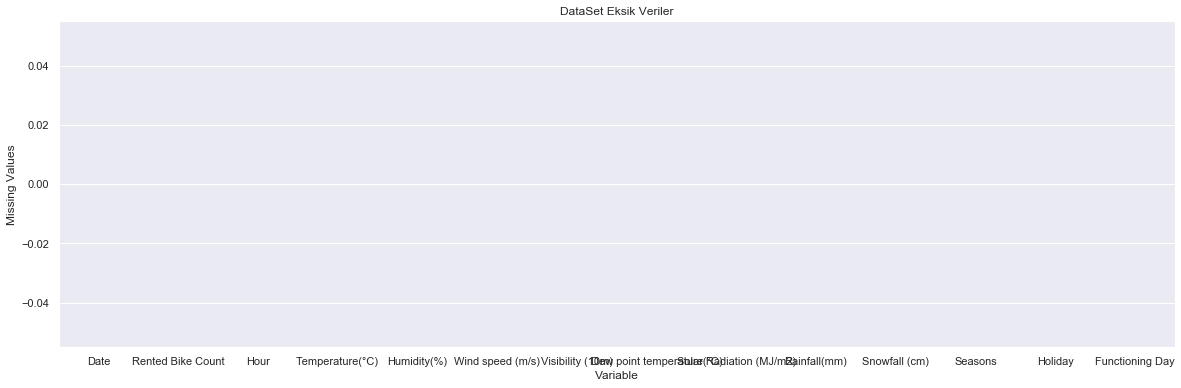

In [7]:
sns.set()
f, ax = plt.subplots(figsize=(20,6))
sns.barplot(x=missing_values.index, y=missing_values.values,)
plt.title("DataSet Eksik Veriler")
plt.ylabel("Missing Values")
plt.xlabel("Variable")

## Seasons

In [8]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


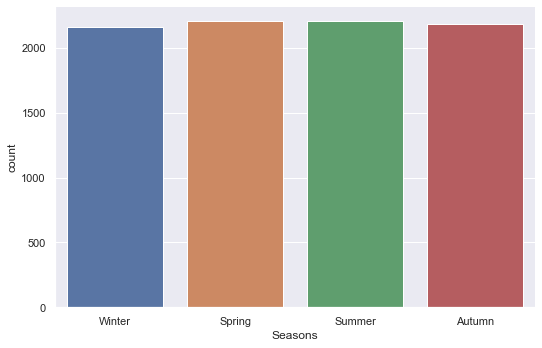

In [9]:
sns.factorplot(x='Seasons',data=df,kind='count',size=5,aspect=1.5)


## Holiday

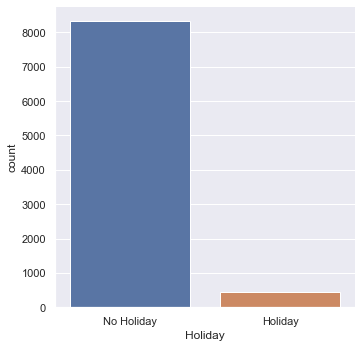

In [10]:
#holiday
df.Holiday.value_counts()
sns.factorplot(x='Holiday',data=df,kind='count',size=5,aspect=1)

## Functioning Day

In [11]:
a = df.groupby("Functioning Day")["Rented Bike Count"].mean()

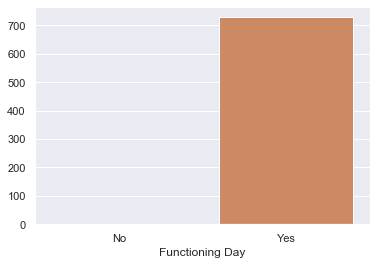

In [12]:
sns.barplot(x= a.index, y= a.values)

## Weather

In [13]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


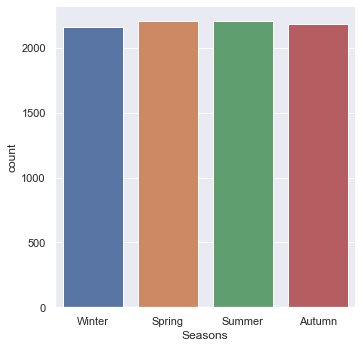

In [14]:
sns.factorplot(x='Seasons',data=df,kind='count',size=5,aspect=1)  

In [15]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


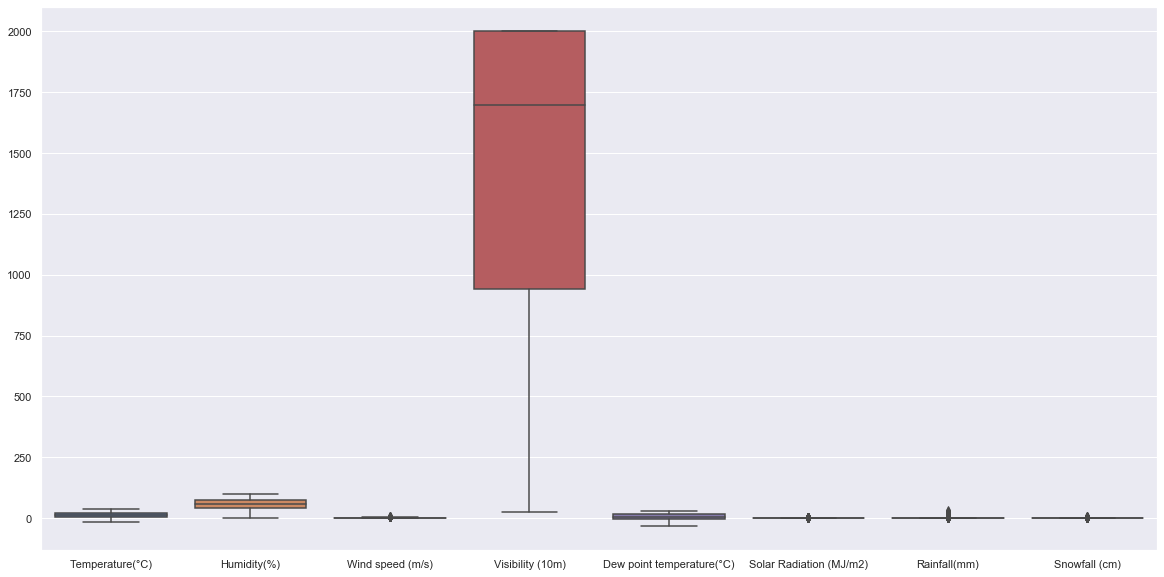

In [16]:
# just to visualize.
sns.boxplot(data=df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']])
fig=plt.gcf()
fig.set_size_inches(20,10)

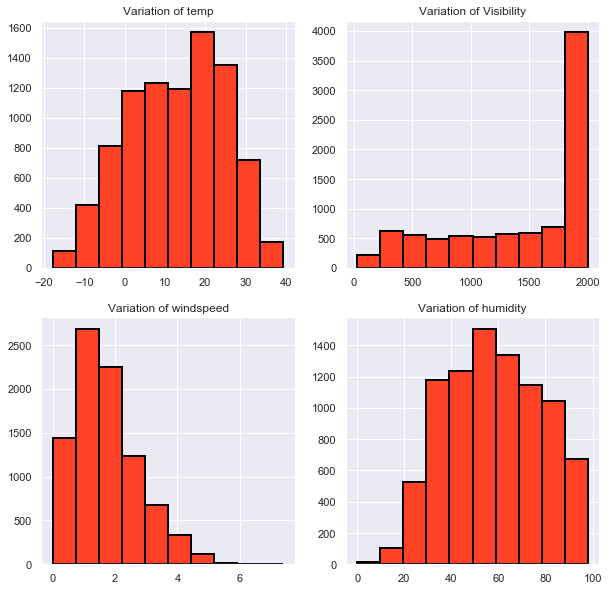

In [17]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="Temperature(°C)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="Visibility (10m)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of Visibility")
axes[1,0].hist(x="Wind speed (m/s)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="Humidity(%)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

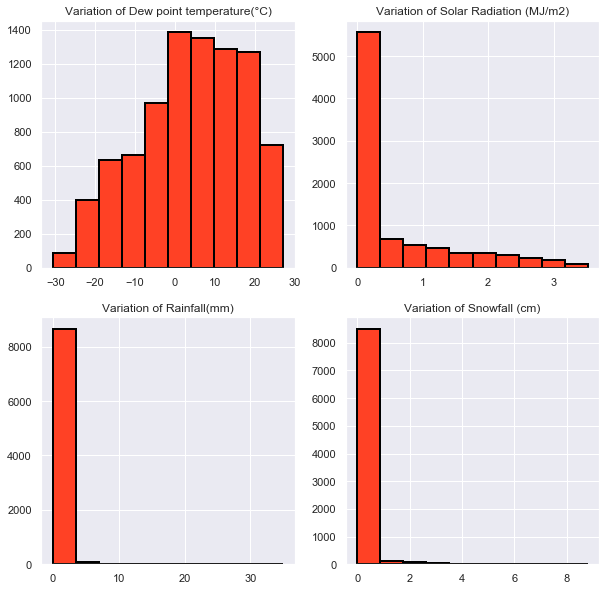

In [18]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="Dew point temperature(°C)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of Dew point temperature(°C)")
axes[0,1].hist(x="Solar Radiation (MJ/m2)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of Solar Radiation (MJ/m2)")
axes[1,0].hist(x="Rainfall(mm)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of Rainfall(mm)")
axes[1,1].hist(x="Snowfall (cm)",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of Snowfall (cm)")
fig.set_size_inches(10,10)

## Korelasyon Grafiği

[]

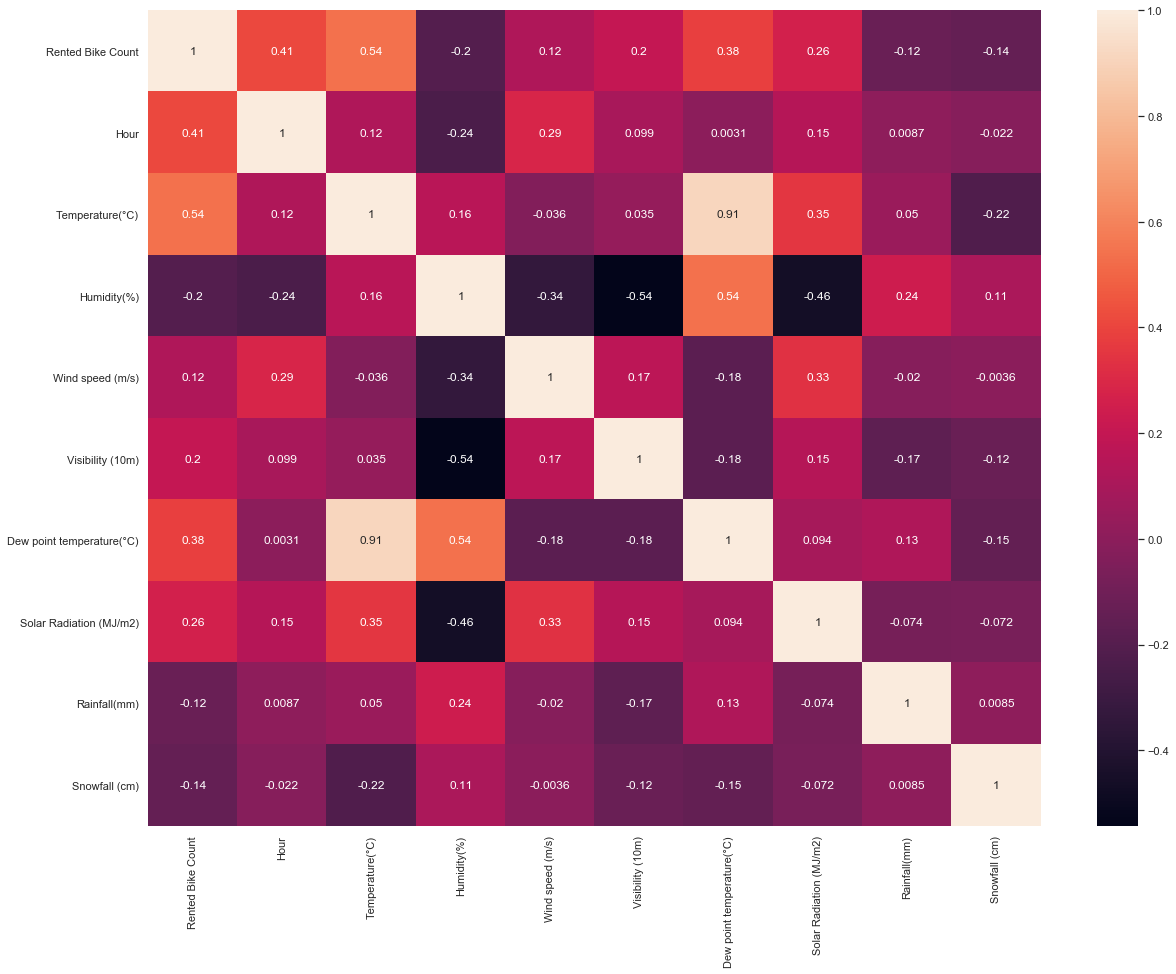

In [19]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.plot()

## Feature Engineering

In [20]:
def dummies(df,col):
    dummy = pd.get_dummies(df, columns = [col])
    return dummy

In [21]:
df = dummies(df,'Seasons')
#df = dummies(df,"Functioning Day")
#df = dummies(df,"Holiday")

In [22]:
def split_date(df):

    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)

    
split_date(df) 

In [23]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
0,2020-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,2020,1,12,2
1,2020-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,2020,1,12,2
2,2020-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,No Holiday,Yes,0,0,0,1,2020,1,12,2
3,2020-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,2020,1,12,2
4,2020-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,No Holiday,Yes,0,0,0,1,2020,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,No Holiday,Yes,1,0,0,0,2021,11,30,48
8756,2021-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,No Holiday,Yes,1,0,0,0,2021,11,30,48
8757,2021-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,No Holiday,Yes,1,0,0,0,2021,11,30,48
8758,2021-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,No Holiday,Yes,1,0,0,0,2021,11,30,48


In [24]:
df.drop('Date',axis=1,inplace=True)
df.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,1,2020,1,12,2
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,1,2020,1,12,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,0,0,0,1,2020,1,12,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,1,2020,1,12,2
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,0,0,0,1,2020,1,12,2


In [25]:
df.drop('Holiday',axis=1,inplace=True)
df.drop('Functioning Day',axis=1,inplace=True)

[]

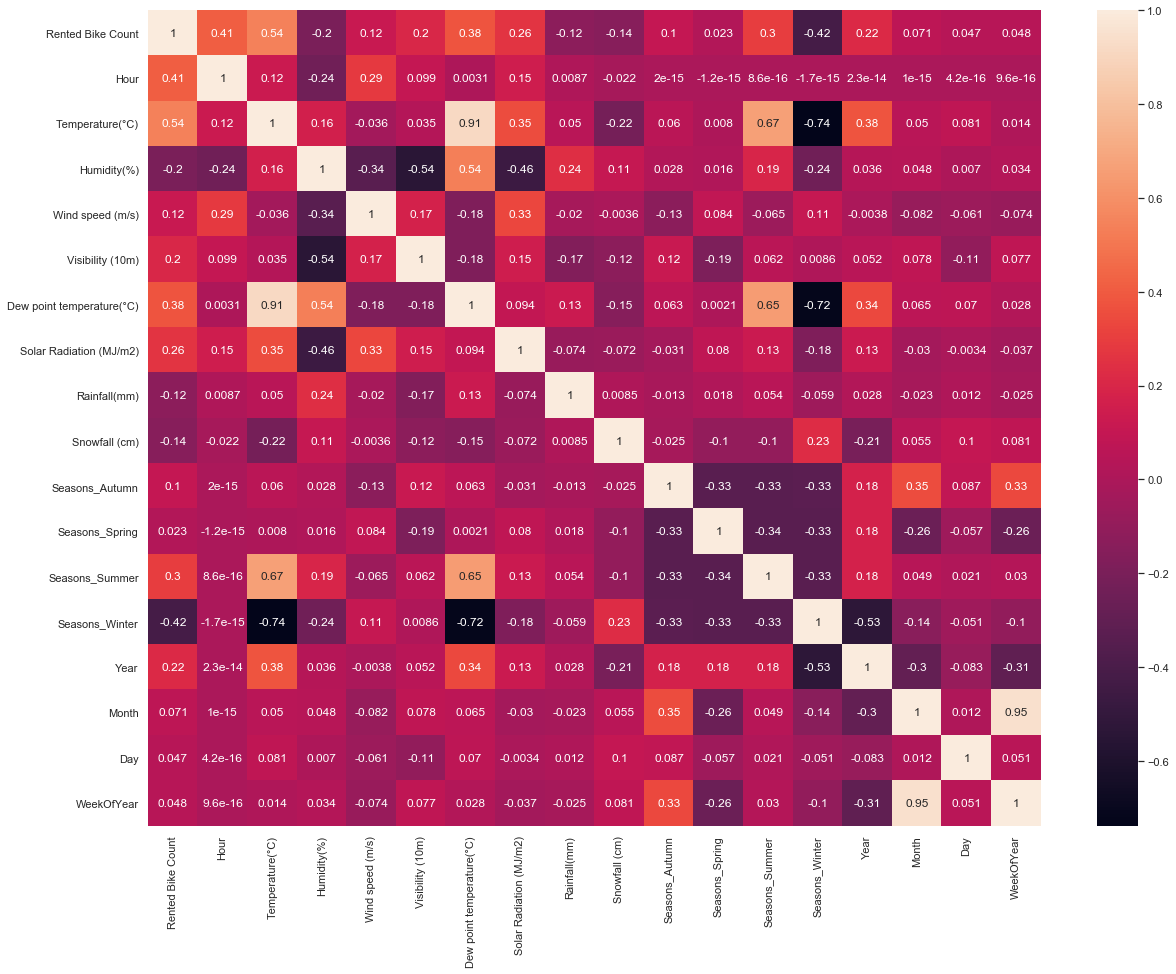

In [26]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.plot()

In [27]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,2021,11,30,48


C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


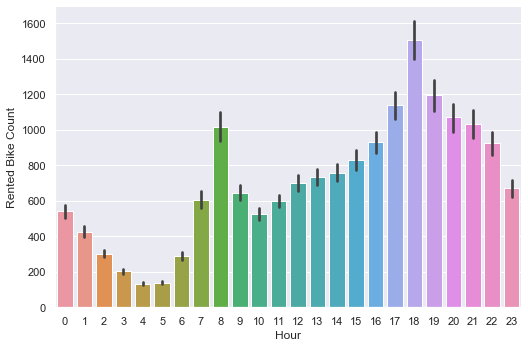

In [28]:
# with hour.
sns.factorplot(x="Hour",y="Rented Bike Count",data=df,kind='bar',size=5,aspect=1.5)

C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


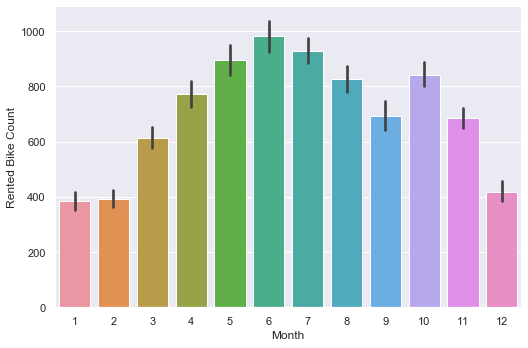

In [29]:
sns.factorplot(x="Month",y="Rented Bike Count",data=df,kind='bar',size=5,aspect=1.5)


C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


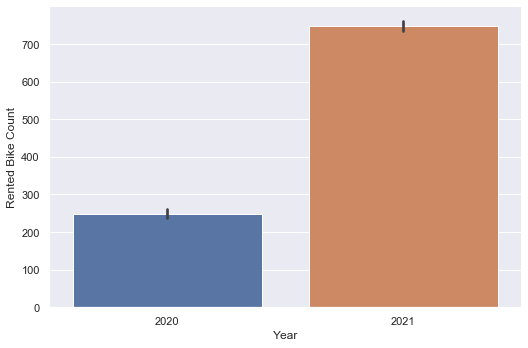

In [30]:
sns.factorplot(x="Year",y="Rented Bike Count",data=df,kind='bar',size=5,aspect=1.5)


C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


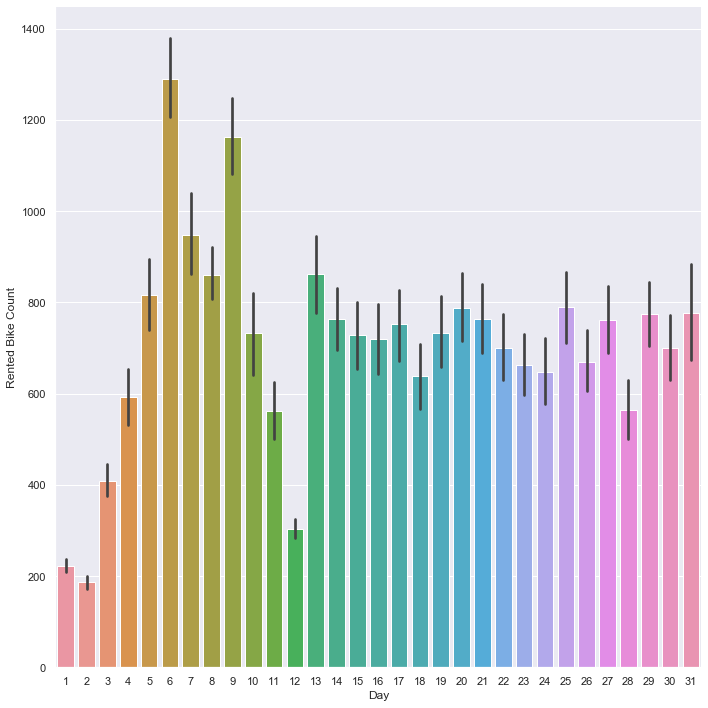

In [31]:
sns.factorplot(x="Day",y='Rented Bike Count',kind='bar',data=df,size=10,aspect=1)

C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


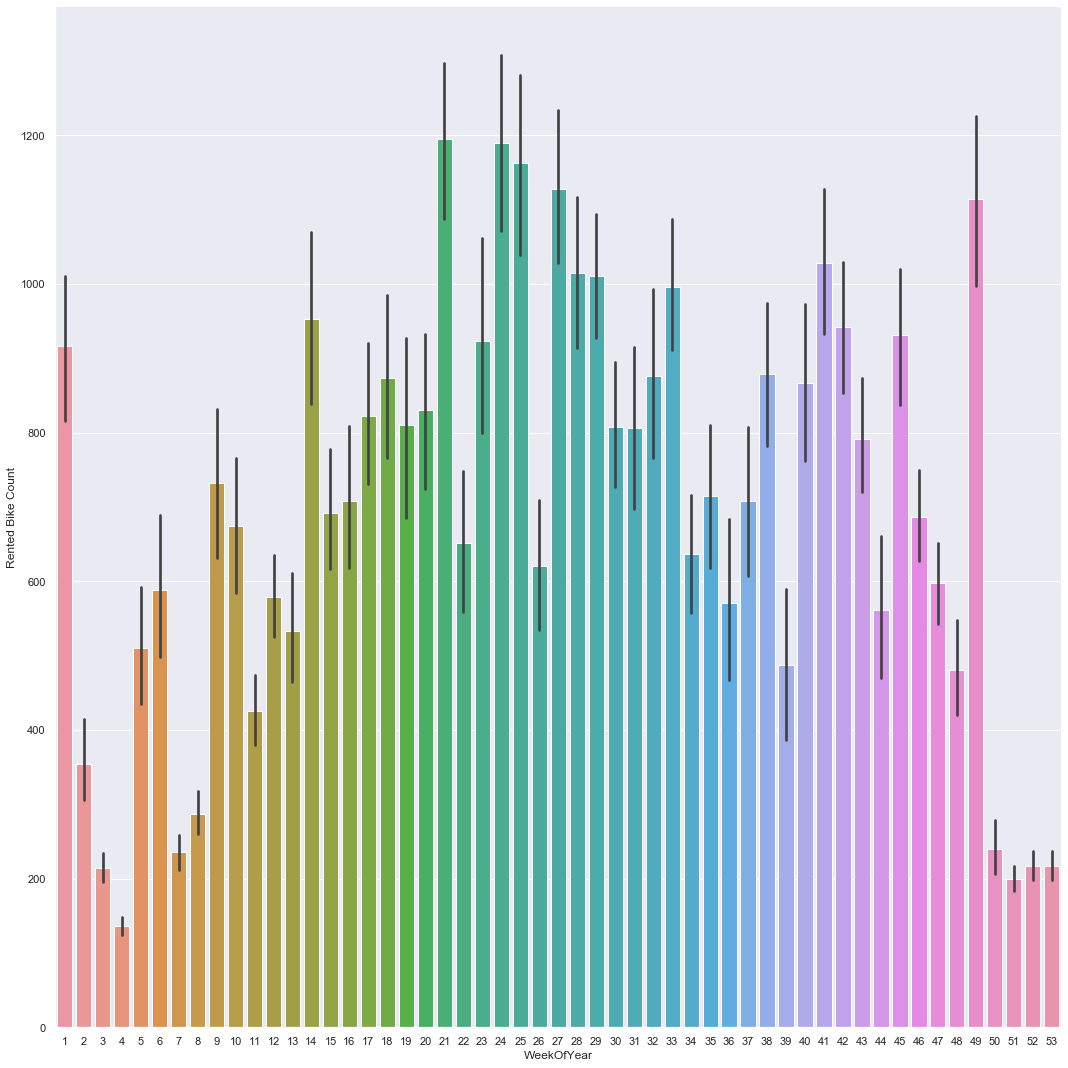

In [32]:
sns.factorplot(x="WeekOfYear",y='Rented Bike Count',kind='bar',data=df,size=15,aspect=1)

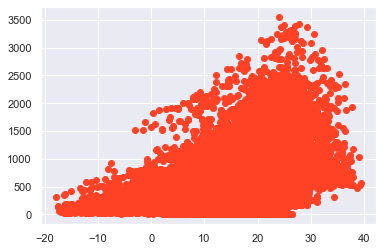

In [33]:
plt.scatter(x="Temperature(°C)",y="Rented Bike Count",data=df,color='#ff4125')

In [34]:
df["Temperature(°C)"].describe()

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(°C), dtype: float64

C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


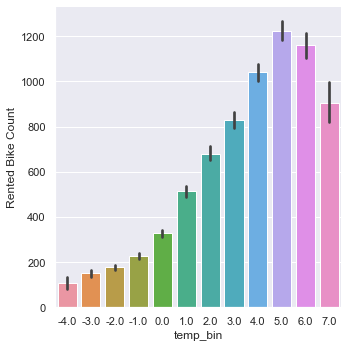

In [35]:
new_df=df.copy()
new_df["Temperature(°C)"].describe()
new_df['temp_bin']=np.floor(new_df['Temperature(°C)'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="temp_bin",y="Rented Bike Count",data=new_df,kind='bar')


In [36]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Year', 'Month', 'Day', 'WeekOfYear'],
      dtype='object')

In [37]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2


## Orders

In [38]:
a = df[df["Rainfall(mm)"] == 0.0]

In [39]:
a = a[a["Temperature(°C)"] > 20.0 ]

In [40]:
a = a[a["Snowfall (cm)"] == 0.0]

In [41]:
a = a[16 < a["Hour"]]

In [42]:
a = a[a["Hour"]<21]

In [43]:
test_dataset = a
import random

In [44]:
random_num = test_dataset.index 

In [45]:
random_index = random.choice(random_num)

In [46]:
random_index

4099

In [47]:
train_dataset = df.drop([random_index])

Burada yapmak istediğm istenilen durumlar üzerine bir test veri seti oluşturmak buradaki test veri seti içerisiden random bir index seçerek bu seçeneği train ederek tahmin sonucumuzu elde edeceğiz. Aynı zamanda random index değerimiz train indexinden düşürülmüş olacak. Yani random index testimiz, random indexin düşütrülmüş olduğu veri seti ise train indeximiz olacak.

In [48]:
train_dataset

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,2021,11,30,48


In [49]:
test_dataset = df[df.index == random_index]


In [50]:
y_test  = test_dataset["Rented Bike Count"]
y_train = train_dataset["Rented Bike Count"]

X_test  = test_dataset.drop(columns=["Rented Bike Count"])
X_train = train_dataset.drop(columns=["Rented Bike Count"])


In [51]:
y_test

4099    2145
Name: Rented Bike Count, dtype: int64

In [52]:
X_test

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
4099,19,20.8,24,2.0,2000,-0.5,0.56,0.0,0.0,0,1,0,0,2021,5,20,20


In [53]:
X_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Year,Month,Day,WeekOfYear
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,2020,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,2021,11,30,48
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,2021,11,30,48


In [54]:
y_train

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8759, dtype: int64

## Data Modelling

In [55]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons_Autumn                 uint8
Seasons_Spring                 uint8
Seasons_Summer                 uint8
Seasons_Winter                 uint8
Year                           int64
Month                          int64
Day                            int64
WeekOfYear                    UInt32
dtype: object

In [56]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 

In [57]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.01434754268220928,
  0.254738490391472,
  0.05683476200881454,
  1.3088738743628072,
  0.03673359424694045]}

In [58]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.014348
1,AdaBoostRegressor,0.254738
2,BaggingRegressor,0.056835
3,SVR,1.308874
4,KNeighborsRegressor,0.036734


C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


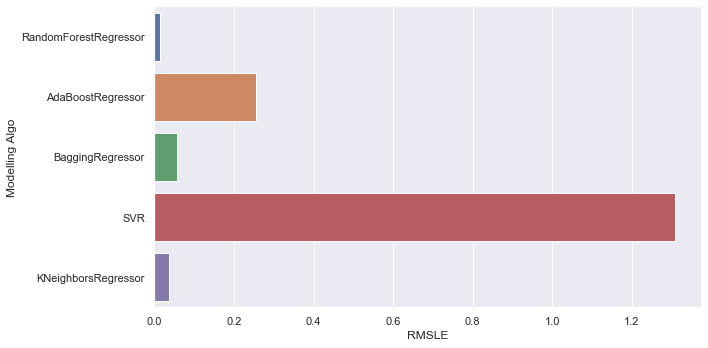

In [59]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)


C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Busra\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


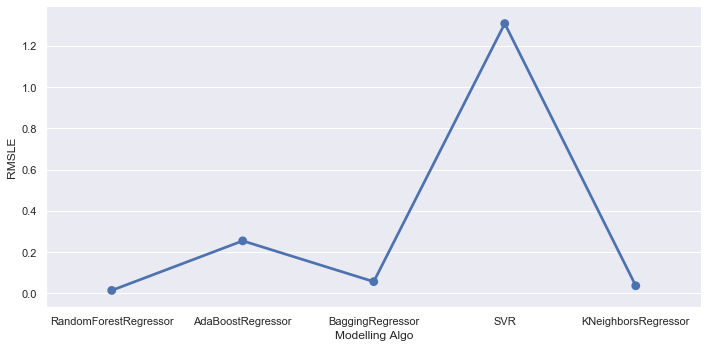

In [60]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)
